Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.optimizers.legacy import Adam
#from tensorflow.keras.optimizers import Adam

#Ignore the warnings
import warnings
warnings.filterwarnings('ignore')


In [4]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [7]:

  !unzip -q /content/gdrive/My\ Drive/CNN_Assignment/CNN_assignment

In [8]:
!ls

 gdrive   sample_data  'Skin cancer ISIC The International Skin Imaging Collaboration'


In [9]:
!ls "Skin cancer ISIC The International Skin Imaging Collaboration"

Test  Train


In [10]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset

#Path to run from google colab
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

#data_dir_train = pathlib.Path("path_to_train_directory")

#Path to run from local noteboo
#data_dir_train = pathlib.Path("C://Users//G50-70//Downloads//CaseStudys//CNN_assignment//Skin cancer ISIC The International Skin Imaging Collaboration\Train")
#data_dir_test = pathlib.Path('C://Users//G50-70//Downloads//CaseStudys//CNN_assignment//Skin cancer ISIC The International Skin Imaging Collaboration\Test')
#data_dir_train_output= pathlib.Path("C://Users//G50-70//Downloads//CaseStudys//CNN_assignment//Skin cancer ISIC The International Skin Imaging Collaboration//Train//output//

In [12]:

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Numer of Train images :   ", image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Numer of Test images :   ", image_count_test)

Numer of Train images :    2239
Numer of Test images :    118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [13]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [14]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
# label_mode='categorical',
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size,
                                                               seed=123,
                                                               subset = 'training',
                                                               validation_split = 0.20)



Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [15]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
#label_mode='categorical',
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size,
                                                             seed=123,
                                                             subset = 'validation',
                                                             validation_split = 0.2)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [16]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [17]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

In [18]:
# Creat directionary to store image path per class
dict_file_path = {}

for i in class_names :
  dict_file_path[i] = list(map(lambda x:str(data_dir_train)+'/'+i+'/'+x,os.listdir(str(data_dir_train)+'/'+i)))
  #print(dict_file_path[i])

# Start vitualization of images, one per class
plt.figure(figsize=(20,20))
index = 0
for i in class_names:
    lst_path = dict_file_path[i][:1]
    index += 1
    plt.subplot(3,3,index)
    plt.imshow(load_img(lst_path[0],target_size=(180,180)))
    plt.title(i)
    plt.axis("off")

Output hidden; open in https://colab.research.google.com to view.

##### In train dataset, find the distribution of each class

In [19]:
#Define a function find class distribution and return DF
def find_class_distribution_cnt(data_set) :

    #count number of image in each classes
    count_var= []
    for path in pathlib.Path(data_set).iterdir():
        if path.is_dir():
            count_var.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_data_set = [name for name in os.listdir(data_set)
                    if os.path.isdir(os.path.join(data_set, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_data_set,count_var)),columns =['Class', 'No. of Image'])

df = find_class_distribution_cnt(data_dir_train)
print(df)

                        Class  No. of Image
0           actinic keratosis           114
1              dermatofibroma            95
2        seborrheic keratosis            77
3             vascular lesion           139
4                       nevus           357
5                    melanoma           438
6  pigmented benign keratosis           462
7     squamous cell carcinoma           181
8        basal cell carcinoma           376


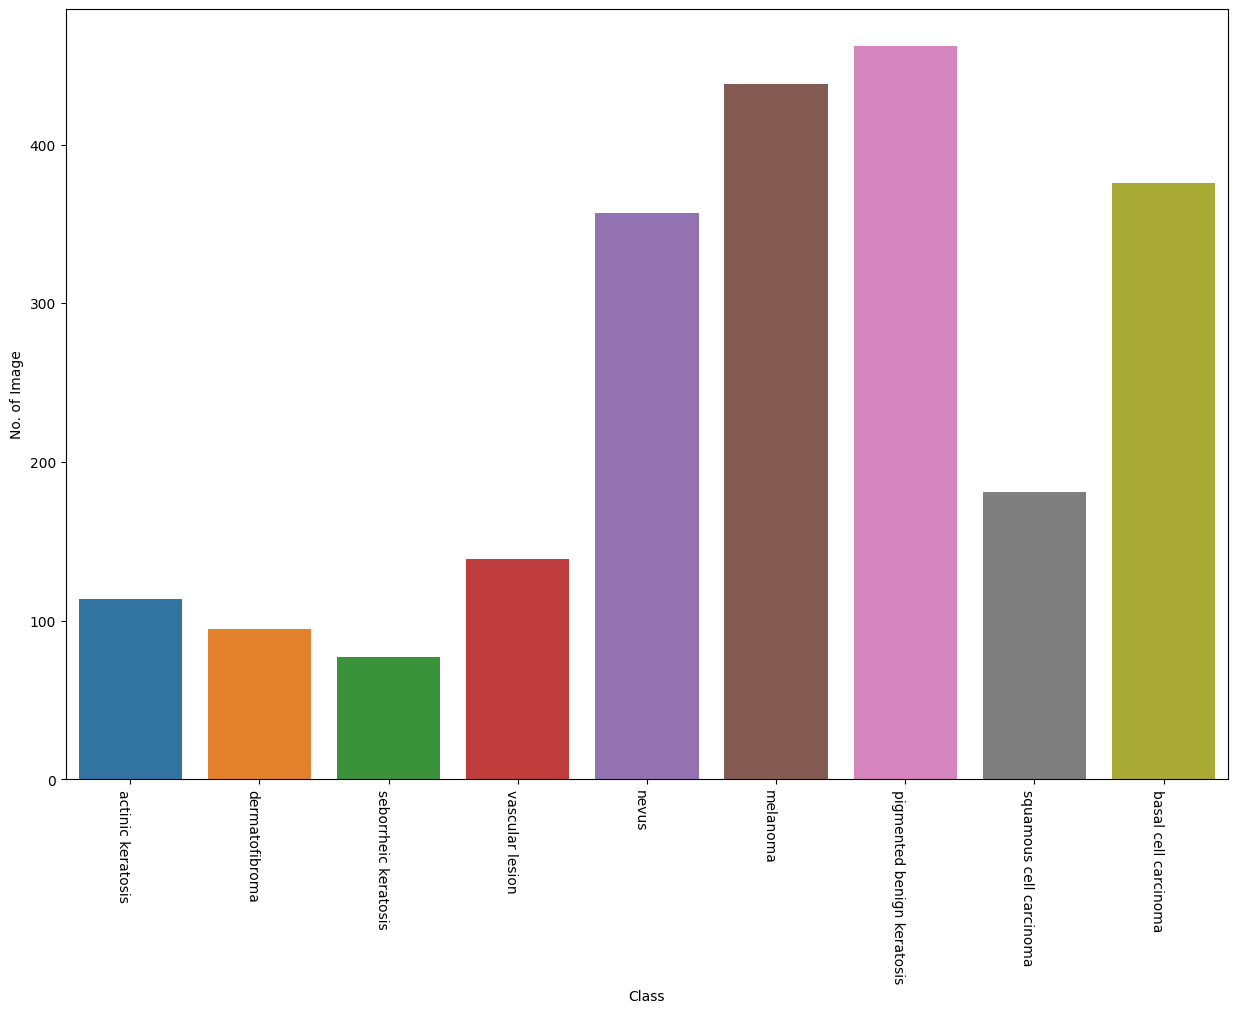

In [20]:
#Plot the count per class
import seaborn as sns
plt.figure(figsize=(15, 10))
plt.xticks(rotation=-90, ha='right')
#fig.set_xticklabels("Clas", rotation=45, ha='right')
sns.barplot(x="Class", y="No. of Image",  data=df,
            label="Class")
plt.show()

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [21]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
#tf.keras.layers.Rescaling(scale, offset=0.0, **kwargs)
#normalization_layer  = tf.keras.layers.experimental.preprocessing.Rescaling(scale =1./255., offset=0.0)

In [22]:
# model
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [23]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [25]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 26s 71ms/step - loss: 2.1432 - accuracy: 0.2154 - val_loss: 1.9918 - val_accuracy: 0.2013
Epoch 2/20
56/56 [==============================] - 1s 21ms/step - loss: 1.7292 - accuracy: 0.3845 - val_loss: 1.4916 - val_accuracy: 0.4899
Epoch 3/20
56/56 [==============================] - 1s 21ms/step - loss: 1.5027 - accuracy: 0.4676 - val_loss: 1.4245 - val_accuracy: 0.4989
Epoch 4/20
56/56 [==============================] - 1s 21ms/step - loss: 1.4334 - accuracy: 0.4944 - val_loss: 1.4753 - val_accuracy: 0.4877
Epoch 5/20
56/56 [==============================] - 1s 22ms/step - loss: 1.2944 - accuracy: 0.5340 - val_loss: 1.4068 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 1s 23ms/step - loss: 1.2527 - accuracy: 0.5614 - val_loss: 1.4749 - val_accuracy: 0.4922
Epoch 7/20
56/56 [==============================] - 1s 24ms/step - loss: 1.2343 - accuracy: 0.5681 - val_loss: 1.4597 - val_accuracy: 0.5391
Epoch 8/20
5

### Visualizing training results

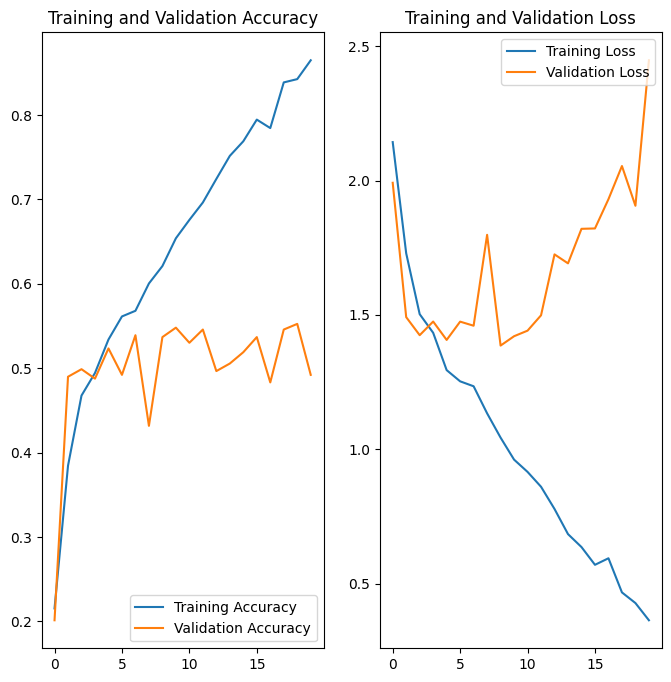

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### From above plot the Training Accuraacy is linearly increases as number of epoches increases, But the validation accuracy increased in beginning few epoches, then stayed around 55.  Also there is huge differene Training and valudation accuracy, which is an indication of model overfitting

In [27]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

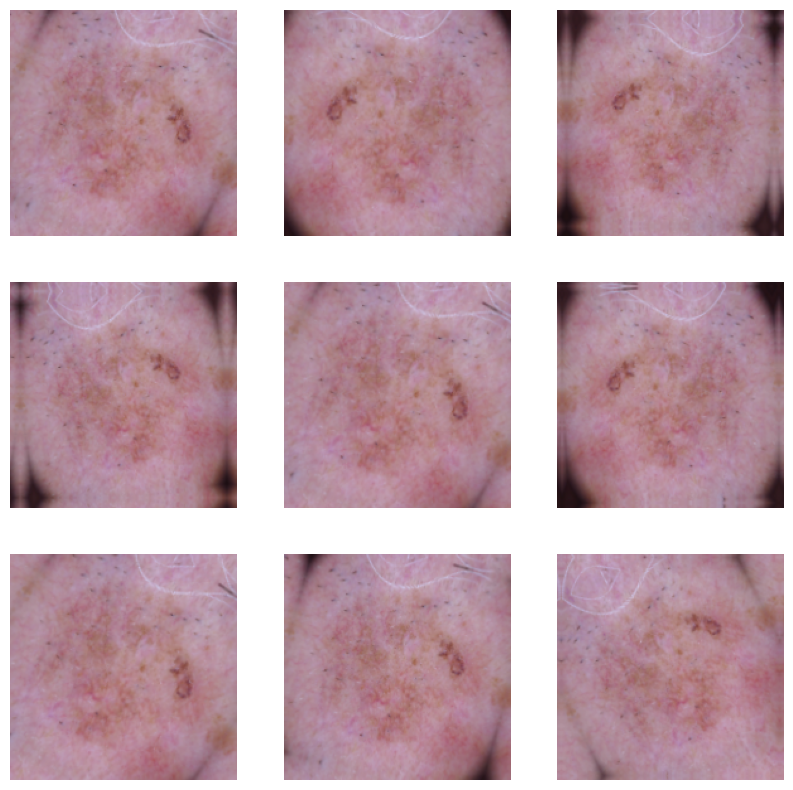

In [28]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [29]:
## You can use Dropout layer if there is an evidence of overfitting in your findings


model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])




### Compiling the model

In [30]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [31]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 5s 34ms/step - loss: 1.9825 - accuracy: 0.2812 - val_loss: 1.7536 - val_accuracy: 0.4116
Epoch 2/20
56/56 [==============================] - 2s 30ms/step - loss: 1.6712 - accuracy: 0.3862 - val_loss: 1.6555 - val_accuracy: 0.4407
Epoch 3/20
56/56 [==============================] - 2s 29ms/step - loss: 1.5448 - accuracy: 0.4448 - val_loss: 1.4500 - val_accuracy: 0.5145
Epoch 4/20
56/56 [==============================] - 2s 32ms/step - loss: 1.4064 - accuracy: 0.5022 - val_loss: 1.4412 - val_accuracy: 0.5436
Epoch 5/20
56/56 [==============================] - 2s 32ms/step - loss: 1.3401 - accuracy: 0.5312 - val_loss: 1.4100 - val_accuracy: 0.5056
Epoch 6/20
56/56 [==============================] - 2s 32ms/step - loss: 1.3857 - accuracy: 0.5067 - val_loss: 1.4106 - val_accuracy: 0.5324
Epoch 7/20
56/56 [==============================] - 2s 33ms/step - loss: 1.3297 - accuracy: 0.5413 - val_loss: 1.3658 - val_accuracy: 0.5324
Epoch 8/20
56

### Visualizing the results

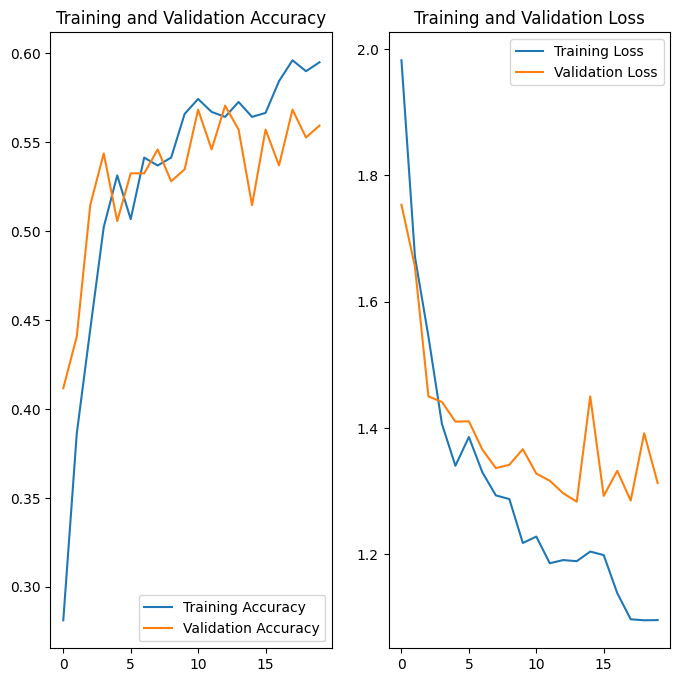

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### From the above plot it shows that traing and valicdation accuracy are close and increasing linearl increasing when as number of epoches goes up. This shows that model has overcome the overfitting.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [33]:
## Your code goes here.
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [34]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
1,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
2,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
3,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
4,Skin cancer ISIC The International Skin Imagin...,actinic keratosis
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,basal cell carcinoma
2235,Skin cancer ISIC The International Skin Imagin...,basal cell carcinoma
2236,Skin cancer ISIC The International Skin Imagin...,basal cell carcinoma
2237,Skin cancer ISIC The International Skin Imagin...,basal cell carcinoma


Class=0, n=114 (5.092%)
Class=2, n=95 (4.243%)
Class=6, n=77 (3.439%)
Class=8, n=139 (6.208%)
Class=4, n=357 (15.945%)
Class=3, n=438 (19.562%)
Class=5, n=462 (20.634%)
Class=7, n=181 (8.084%)
Class=1, n=376 (16.793%)


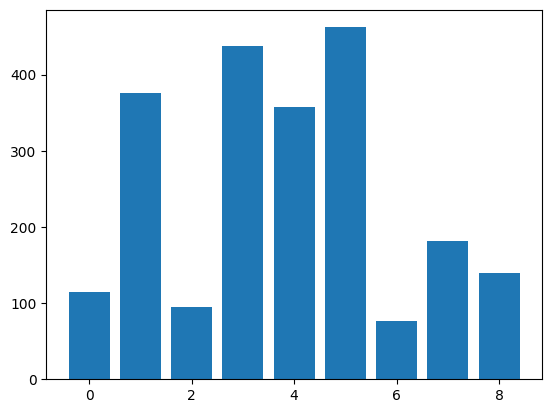

In [35]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

#### **Todo:** Write your findings here:
##### From the above plot there is class imbalenace.  
#### - Which class has the least number of samples?
##### Class 6 has least number of samples. It has n=77 (3.439%) samples only
#### - Which classes dominate the data in terms proportionate number of samples?
##### Calss 6 dominates the data. It is 462 samples with 20.634% of total samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [36]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [38]:
#Path to run from google colab
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
#Path to run from local notebook
#path_to_training_dataset="C://Users//G50-70//Downloads//CaseStudys//CNN_assignment//Skin cancer ISIC The International Skin Imaging Collaboration//Train"
#pathlib.Path(


#path_to_training_dataset="To do"
import Augmentor
for i in class_names:
    # For google colab
    p = Augmentor.Pipeline(pathlib.Path(path_to_training_dataset + str(i)))
    # TO run from local notebook
    #p = Augmentor.Pipeline("C://Users//G50-70//Downloads//CaseStudys//CNN_assignment//Skin cancer ISIC The International Skin Imaging Collaboration//Train")
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78B7C770B3A0>: 100%|██████████| 500/500 [00:15<00:00, 32.13 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78B7B5338250>: 100%|██████████| 500/500 [00:16<00:00, 30.71 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78B7C770A770>: 100%|██████████| 500/500 [00:17<00:00, 28.90 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78B8675D82E0>: 100%|██████████| 500/500 [01:44<00:00,  4.80 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78B8E1B51180>: 100%|██████████| 500/500 [01:37<00:00,  5.10 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x78B7B57A5780>: 100%|██████████| 500/500 [00:16<00:00, 29.73 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78B7B529B010>: 100%|██████████| 500/500 [00:40<00:00, 12.44 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78B7B53EC700>: 100%|██████████| 500/500 [00:15<00:00, 31.25 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78B7B53666E0>: 100%|██████████| 500/500 [00:16<00:00, 31.00 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [40]:
#To run from google colab
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
#To run from local noteboo
#image_count_train = len(list(data_dir_train_output.glob('*/*.jpg')))

print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [41]:
#To run from google colab
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#To run from local notebook

#path_list = [x for x in glob(os.path.join(data_dir_train_output, '*', '*.jpg'))]
path_list

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0029781.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0025803.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0027615.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0032206.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0028314.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0028063.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0026857.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0031922.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/ISIC_0029309.jpg',
 'Skin cancer ISIC The International 

In [42]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#path_list =         [x for x in glob(os.path.join(data_dir_train_output, '*', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [43]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [44]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [45]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [46]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [48]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size,
                                                               seed=123,
                                                               subset = 'training',
                                                               validation_split = 0.20)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [49]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size,
                                                             seed=123,
                                                             subset = 'validation',
                                                             validation_split = 0.2)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [50]:
## your code goes here
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [51]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [57]:
epochs = 30
## Your code goes here, use 50 epochs.
#epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/30
169/169 [==============================] - 5s 31ms/step - loss: 0.1621 - accuracy: 0.9425 - val_loss: 0.7831 - val_accuracy: 0.8174
Epoch 2/30
169/169 [==============================] - 5s 29ms/step - loss: 0.1285 - accuracy: 0.9496 - val_loss: 0.7710 - val_accuracy: 0.8404
Epoch 3/30
169/169 [==============================] - 5s 28ms/step - loss: 0.1561 - accuracy: 0.9412 - val_loss: 0.7860 - val_accuracy: 0.8137
Epoch 4/30
169/169 [==============================] - 5s 31ms/step - loss: 0.1119 - accuracy: 0.9566 - val_loss: 0.7809 - val_accuracy: 0.8196
Epoch 5/30
169/169 [==============================] - 5s 29ms/step - loss: 0.1720 - accuracy: 0.9408 - val_loss: 0.8693 - val_accuracy: 0.8137
Epoch 6/30
169/169 [==============================] - 5s 28ms/step - loss: 0.1613 - accuracy: 0.9407 - val_loss: 0.8209 - val_accuracy: 0.8025
Epoch 7/30
169/169 [==============================] - 5s 29ms/step - loss: 0.1050 - accuracy: 0.9573 - val_loss: 0.9331 - val_accuracy: 0.8166

#### **Todo:**  Visualize the model results

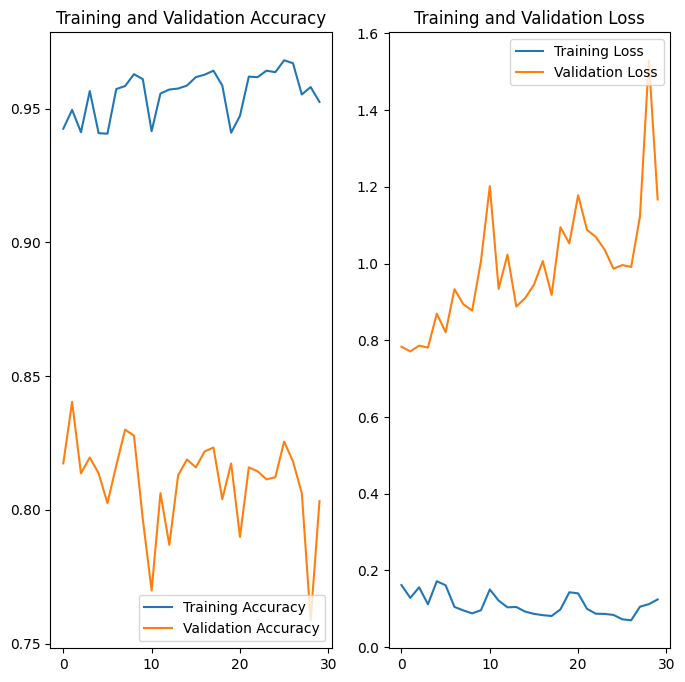

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Did you get rid of underfitting/overfitting?
#### Yes got rid off model overfitting after rebalancing class imbalence with data agumentation.
#### Still possible to improve the model by trying with different model optimizer

### Did class rebalance help?
#### Yes. Class rebalencing helped to impove model performane on unseen data.

#### With 30 epoches mdoel is performing well on training data. Also model performace increased on unseen data